In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_dir = "data/"
all_data = []
for file in sorted(glob(data_dir + "*.csv")):
    df = pd.read_csv(file, index_col=0)
    df['file'] = file[13:-4]
    all_data.append(df)

data = pd.concat(all_data)
data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,file
initial,tape,mabi,dage,kipobo,ponebe,bude,pigoba,mupote,buta,datupi,...,gokuna,gope,kegoto,biduga,tegonu,bogo,tine,dumo,bakama,chain1
oliver,mape,mipe,godoba,tikami,ponebe,tipe,noko,niki,pobo,temu,...,duga,gobe,panaba,tanu,bugu,bogo,puma,bugu,bakama,chain1
GPT5,bakupo,mipe,gupe,denu,miki,niki,tenaki,naku,tenu,biku,...,buta,gupako,gaku,gapuka,gope,gatiko,puma,gako,bino,chain1
Aimee,biku,biku,gupe,gupe,gakoku,niki,beto,niki,niki,biku,...,geko,gukate,gutepo,keto,neko,puka,puma,beko,peko,chain1
Hi,bikeka,babe,biko,bake,buke,bikuke,bika,baku,bikuku,bike,...,bekupu,niga,boke,bokupe,boku,bekuke,peku,poku,beke,chain1
bl,babapo,dodo,pika,pimipo,pimipo,mikupo,miku,popopo,bapopo,popopo,...,pikako,dododo,pimido,dodo,mikuko,midodo,bami,bamido,babado,chain1
Ziqian,bapo,popopo,pika,bamipo,miku,mikupo,miku,mikupo,babapo,popo,...,bamiko,bamiko,bamiko,bamiko,mikuko,mikuko,babako,babako,babado,chain1
Tony,babapo,popopo,piku,pimika,bamiko,mikupo,mikupo,mipopo,popo,popo,...,pidodo,bamido,bamido,bamiku,mikudo,pikado,bamiku,babado,babado,chain1
Mingyang,bababu,bababu,pika,pikaku,mikuku,mikuku,mikuko,mikuku,bababo,bababu,...,pikako,bamimu,mikuko,mikuku,mikuko,mikuko,mikuku,bababo,bababo,chain1
Celinda Zhu,bababu,bababu,pika,mikuku,miku,mikuku,mikuku,mikuku,bababo,bababu,...,pikaka,pikaka,mikuko,mikuko,mikuko,mikuko,mikuku,bababo,bababo,chain1


#### Less entropy over generations

In [14]:
def frequency_data(list_of_strings, length=1):
    '''
    frequency of substrings of length len in list_of_strings
    '''
    freq = Counter()
    for string in list_of_strings:
        freq.update([string[i:i+length] for i in range(0, len(string)-1, length % 2 + 2)])
    return freq

def calc_entropy(freq):
    '''
    entropy of a frequency distribution
    '''
    total = sum(freq.values())
    probs = [freq[key]/total for key in freq.keys()]
    return -sum([p*np.log2(p) for p in probs])

rows = []
for l in [1, 2, 4]:
    for file in ['chain1', 'chain2', 'chain3']:
        i = 0
        chain_data = data[data['file'] == file]
        for _, row in chain_data.iterrows():
            strings = row.drop('file').values
            freq = frequency_data(strings, length=l)
            entropy = calc_entropy(freq)
            r = [row['file'], i, l, entropy]
            rows.append(r)
            i += 1
freq_df = pd.DataFrame(rows, columns=["file", "iter", "length", "entropy"])
print(freq_df)

       file  iter  length   entropy
0    chain1     0       1  3.514215
1    chain1     1       1  3.157844
2    chain1     2       1  3.184830
3    chain1     3       1  2.679077
4    chain1     4       1  1.422668
..      ...   ...     ...       ...
103  chain3     7       4  3.952750
104  chain3     8       4  4.465696
105  chain3     9       4  3.640886
106  chain3    10       4  4.081450
107  chain3    11       4  4.071443

[108 rows x 4 columns]


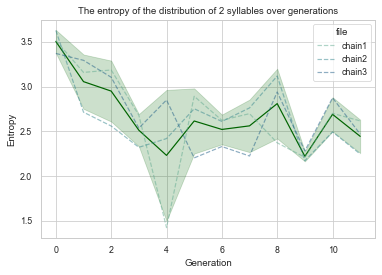

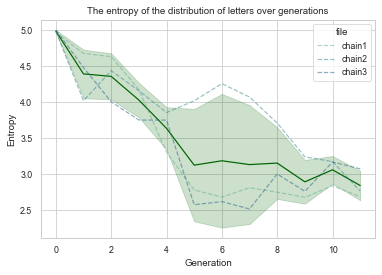

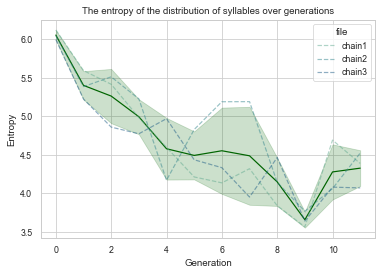

In [15]:
sns.set_style("whitegrid")
sns.set_context("paper")
name = ['The entropy of the distribution of ' + n + ' over generations' for n in ['letters', 'syllables', '2 syllables']]
for l in [1, 2, 4]:
    plt.figure()
    sns.lineplot(x="iter", y="entropy", data=freq_df[freq_df["length"]==l], markers=True, errorbar='sd', color='darkgreen')
    sns.lineplot(x="iter", y="entropy", hue="file", data=freq_df[freq_df["length"]==l], markers=True, linestyle='--', palette="crest", alpha=0.5)
    plt.xlabel("Generation")
    plt.ylabel("Entropy")
    plt.title(name[int(np.log2(l)-1)])
    plt.savefig(f'plots/freq_analysis_{l}.jpg', dpi=400)
    plt.show()

#### Individual color terms become more consistent over generations

In [10]:
#### distance metrics ####

def shared_number_of_syllables(word1, word2):
    '''
    number of syllables shared by two words
    '''
    syllables1 = [word1[i:i+2] for i in range(0, len(word1)-1, 2)]
    syllables2 = [word2[i:i+2] for i in range(0, len(word2)-1, 2)]
    shared = [min(syllables1.count(syllable), syllables2.count(syllable)) for syllable in set(syllables1)]
    return sum(shared)

def edit_distance(word1, word2):
    '''
    edit distance between two words
    '''
    if len(word1) > len(word2):
        word1, word2 = word2, word1
    distances = range(len(word1) + 1)
    for i2, c2 in enumerate(word2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(word1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [11]:
def differences_across_generation(col, distance_metric, kernel=[1]):
    diffs = []
    for i in range(len(kernel), len(col)):
        diff = 0
        for j in range(len(kernel)):
            diff += kernel[j] * distance_metric(col[i-j-1], col[i])
        diffs.append(diff / sum(kernel))
    return diffs

In [12]:
differences_across_generation(all_data[0]["0"], shared_number_of_syllables, kernel=[1])

[1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 2.0, 2.0, 3.0, 0.0, 0.0]

In [28]:
rows = []
columns = ["file", "color", "iter", "distance", "value"]
for data_n, data in enumerate(all_data):
    for dist in [shared_number_of_syllables, edit_distance]:
        for col_n, col in data.items():
            diffs = differences_across_generation(col, dist, kernel=[0.25, 0.5, 1])
            for j in range(len(diffs)):
                r = [f'chain{data_n+1}', col_n, j, dist.__name__, diffs[j]]
                rows.append(r)
diff_df = pd.DataFrame(rows, columns=columns)
print(diff_df)

        file color  iter                    distance     value
0     chain1     0     0  shared_number_of_syllables  0.142857
1     chain1     0     1  shared_number_of_syllables  0.142857
2     chain1     0     2  shared_number_of_syllables  1.142857
3     chain1     0     3  shared_number_of_syllables  0.285714
4     chain1     0     4  shared_number_of_syllables  1.142857
...      ...   ...   ...                         ...       ...
1615  chain3    29     4               edit_distance  4.428571
1616  chain3    29     5               edit_distance  5.142857
1617  chain3    29     6               edit_distance  4.714286
1618  chain3    29     7               edit_distance  3.857143
1619  chain3    29     8               edit_distance  4.571429

[1620 rows x 5 columns]


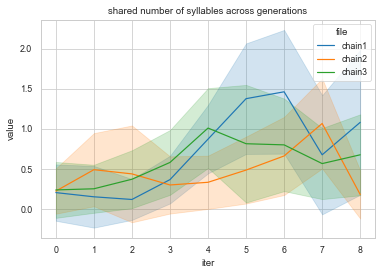

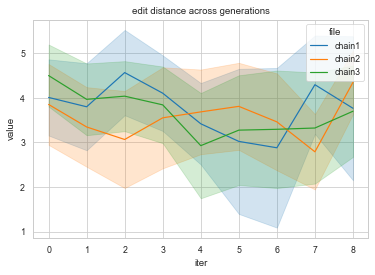

In [29]:
for dist in [shared_number_of_syllables, edit_distance]:
    plt.figure()
    sns.lineplot(x="iter", y="value", hue="file", data=diff_df[diff_df["distance"]==dist.__name__], markers=True, errorbar='sd')
    plt.title(f'{(dist.__name__).replace("_", " ")} across generations')
    # plt.savefig(f'plots/{dist.__name__}.jpg', dpi=400)
    plt.show()